# Cleaning GoodReads Data

In [2]:
import pandas as pd #data processing
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:.2f}'.format


%matplotlib inline

In [3]:

df = pd.read_csv('https://raw.githubusercontent.com/LizK/Intro-to-Python-Course/master/Datasets/books.csv', error_bad_lines=False)
df.dataframe = 'books.csv'

print("Dataset contains {} rows and {} columns".format(df.shape[0], df.shape[1]))

Dataset contains 11123 rows and 12 columns


b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


In [4]:
#Overview of the data
df.head(10)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic
5,9,"Unauthorized Harry Potter Book Seven News: ""Ha...",W. Frederick Zimmerman,3.74,0976540606,9780976540601,en-US,152,19,1,4/26/2005,Nimble Books
6,10,Harry Potter Collection (Harry Potter #1-6),J.K. Rowling,4.73,0439827604,9780439827607,eng,3342,28242,808,9/12/2005,Scholastic
7,12,The Ultimate Hitchhiker's Guide: Five Complete...,Douglas Adams,4.38,0517226952,9780517226957,eng,815,3628,254,11/1/2005,Gramercy Books
8,13,The Ultimate Hitchhiker's Guide to the Galaxy ...,Douglas Adams,4.38,0345453743,9780345453747,eng,815,249558,4080,4/30/2002,Del Rey Books
9,14,The Hitchhiker's Guide to the Galaxy (Hitchhik...,Douglas Adams,4.22,1400052920,9781400052929,eng,215,4930,460,8/3/2004,Crown


In [5]:
#Checking the Columns
df.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', '  num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')

In [6]:
df.shape

(11123, 12)

In [7]:
df['authors'].nunique()

6639

In [10]:
df.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11123.00,11123.00,11123.00,11123.00,11123.00,11123.00
mean,21310.86,3.93,9759880247639.18,336.41,17942.85,542.05
std,13094.73,0.35,442975846058.35,241.15,112499.15,2576.62
min,1.00,0.00,8987059752.00,0.00,0.00,0.00
25%,10277.50,3.77,9780345453803.50,192.00,104.00,9.00
50%,20287.00,3.96,9780582461536.00,299.00,745.00,47.00
75%,32104.50,4.14,9780872208045.50,416.00,5000.50,238.00
max,45641.00,5.00,9790007672386.00,6576.00,4597666.00,94265.00


In [11]:
df['language_code'].unique()

array(['eng', 'en-US', 'fre', 'spa', 'en-GB', 'mul', 'grc', 'enm',
       'en-CA', 'ger', 'jpn', 'ara', 'nl', 'zho', 'lat', 'por', 'srp',
       'ita', 'rus', 'msa', 'glg', 'wel', 'swe', 'nor', 'tur', 'gla',
       'ale'], dtype=object)

In [12]:
df.replace(to_replace='J.K. Rowling/Mary GrandPré', value = 'J.K. Rowling', inplace=True)

In [13]:
df.head(5)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [14]:
df.count().sort_values()

bookID                11123
title                 11123
authors               11123
average_rating        11123
isbn                  11123
isbn13                11123
language_code         11123
  num_pages           11123
ratings_count         11123
text_reviews_count    11123
publication_date      11123
publisher             11123
dtype: int64

In [15]:
df.rename(columns={'num_pages':'total_pages'},inplace=True) #renaming columns
df.head(2)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.


In [16]:
missing_pct = ((df.isna().sum() / df.shape[0]) * 100)
missing_pct

bookID               0.00
title                0.00
authors              0.00
average_rating       0.00
isbn                 0.00
isbn13               0.00
language_code        0.00
  num_pages          0.00
ratings_count        0.00
text_reviews_count   0.00
publication_date     0.00
publisher            0.00
dtype: float64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7     num_pages         11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


# Cleaning the data

In [18]:
#Checking for any duplicates
df.duplicated().sum()

0

In [19]:
#Fixing num_page which has indentation
df.rename(columns = {'  num_pages': 'total_pages'}, inplace=True)

In [20]:
df.head(1)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,total_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.


In [21]:
# find the book data with 0 page
df[df['total_pages'] == 0]

,bookID,title,authors,average_rating,isbn,isbn13,language_code,total_pages,ratings_count,text_reviews_count,publication_date,publisher
306,955,The 5 Love Languages / The 5 Love Languages Jo...,Gary Chapman,4.70,0802415318,9780802415318,eng,0,22,4,1/1/2005,Moody Publishers
853,2835,The Tragedy of Pudd'nhead Wilson,Mark Twain/Michael Prichard,3.79,140015068X,9781400150687,eng,0,3,0,1/1/2003,Tantor Media
1061,3593,Murder by Moonlight & Other Mysteries (New Adv...,NOT A BOOK,4.00,0743564677,9780743564670,eng,0,7,2,10/3/2006,Simon Schuster Audio
1064,3599,The Unfortunate Tobacconist & Other Mysteries ...,NOT A BOOK,3.50,074353395X,9780743533959,eng,0,12,1,10/1/2003,Simon & Schuster Audio
1230,4249,The Da Vinci Code (Robert Langdon #2),Dan Brown/Paul Michael,3.84,0739339788,9780739339787,eng,0,91,16,3/28/2006,Random House Audio
1558,5362,The Summons / The Brethren,John Grisham/Michael Beck/Frank Muller,3.99,0739342770,9780739342770,eng,0,241,9,10/10/2006,Random House Audio
1842,6542,The Patricia Cornwell CD Audio Treasury: All T...,Patricia Cornwell/Kate Burton,4.16,0060791217,9780060791216,eng,0,202,1,7/26/2005,HarperAudio
1933,6953,Like Water for Chocolate,Laura Esquivel/Yareli Arizmendi,3.95,0739334190,9780739334195,eng,0,121,33,5/2/2006,Random House Audio
2105,7598,A Study Guide to Gabriel Garcia Marquez' One H...,Gabriel García Márquez/Brenda K. Marshall/F. M...,4.11,1570421129,9781570421129,eng,0,75,2,4/1/2006,Warner Adult
2129,7674,The Michael Crichton Collection: Airframe / Th...,Michael Crichton/Stephen Lang/Anthony Heald/Bl...,4.16,0739340336,9780739340332,en-GB,0,267,7,8/29/2006,Random House Audio


In [25]:
#Replacing total page from 0 to the average page of all books

df.loc[df['total_pages'] == 0, 'total_pages'] = df['total_pages'].mean()

In [26]:
df['total_pages'] = df['total_pages'].astype(int)

In [27]:
df.to_csv('books_ready_data.csv', index=False)

# Exploratory Data Analysis

In [28]:
array=["ratings_count"]
df.groupby("language_code").mean().sort_values("average_rating",ascending = False)[array]

,ratings_count
language_code,
wel,1.00
gla,11.00
zho,20.43
tur,1000.00
ale,102.00
lat,114.67
jpn,68.30
rus,4477.00
nl,67.00


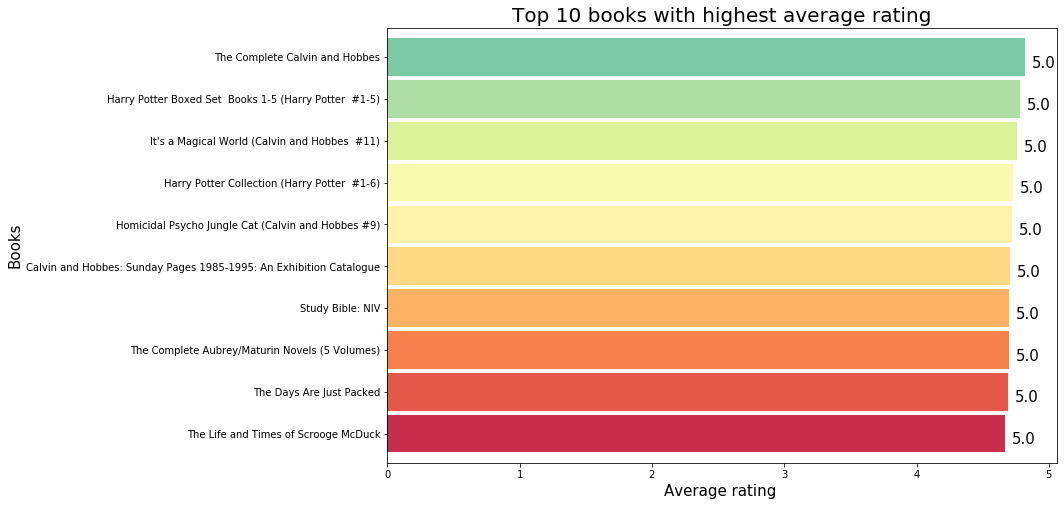

In [29]:
high_average_rating =df[df['ratings_count'] > 1000]
high_average_rating = high_average_rating.sort_values('average_rating',ascending=False).head(10).set_index('title')
plt.subplots(figsize=(12,8))
ax = high_average_rating['average_rating'].sort_values().plot.barh(width=0.9,color=sns.color_palette('Spectral',12))
ax.set_xlabel("Average rating ", fontsize=15)
ax.set_ylabel("Books", fontsize=15)
ax.set_title("Top 10 books with highest average rating",fontsize=20,color='black')
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width()+.05, i.get_y()+.2,str(round(i.get_width())), fontsize=15,color='black')
plt.show()

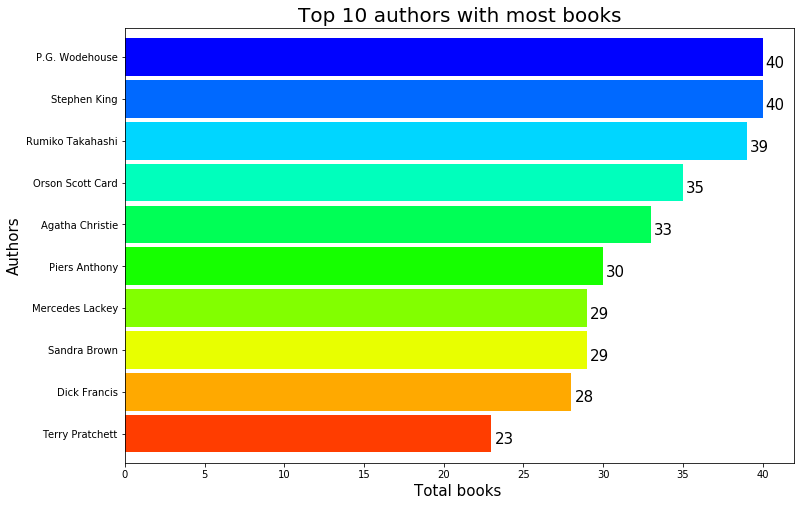

In [30]:
author_of_most_books = df.groupby('authors')['title'].count().reset_index().sort_values('title',ascending=False).head(10).set_index('authors')
plt.subplots(figsize=(12,8))
ax = author_of_most_books['title'].sort_values().plot.barh(width=0.9,color=sns.color_palette('gist_rainbow',12))
ax.set_xlabel("Total books ", fontsize=15)
ax.set_ylabel("Authors", fontsize=15)
ax.set_title("Top 10 authors with most books",fontsize=20,color='black')
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width()+.2, i.get_y()+.2,str(round(i.get_width())), fontsize=15,color='black')
plt.show()

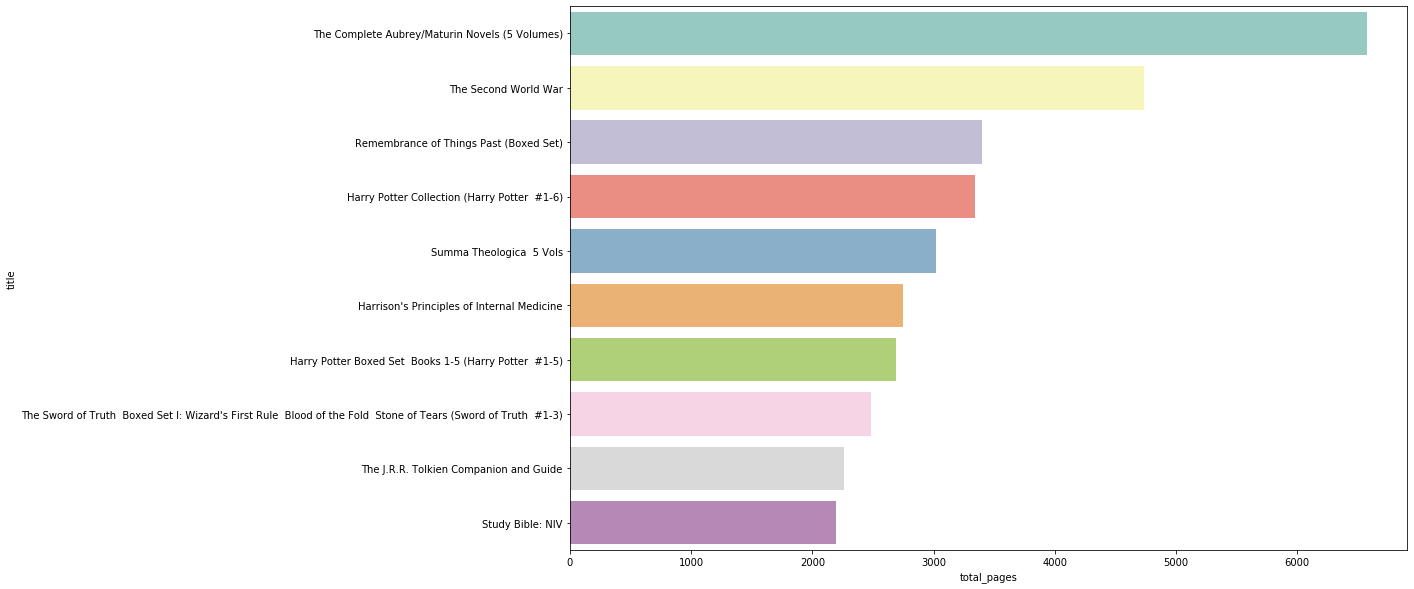

In [31]:
#Top 10 books with high number of pages
most_rated = df.sort_values('total_pages', ascending = False).head(10).set_index('title')
plt.figure(figsize=(15,10))
sns.barplot(most_rated['total_pages'], most_rated.index, palette='Set3')

Text(0.5, 1.0, '100 Best Average Rating Books')

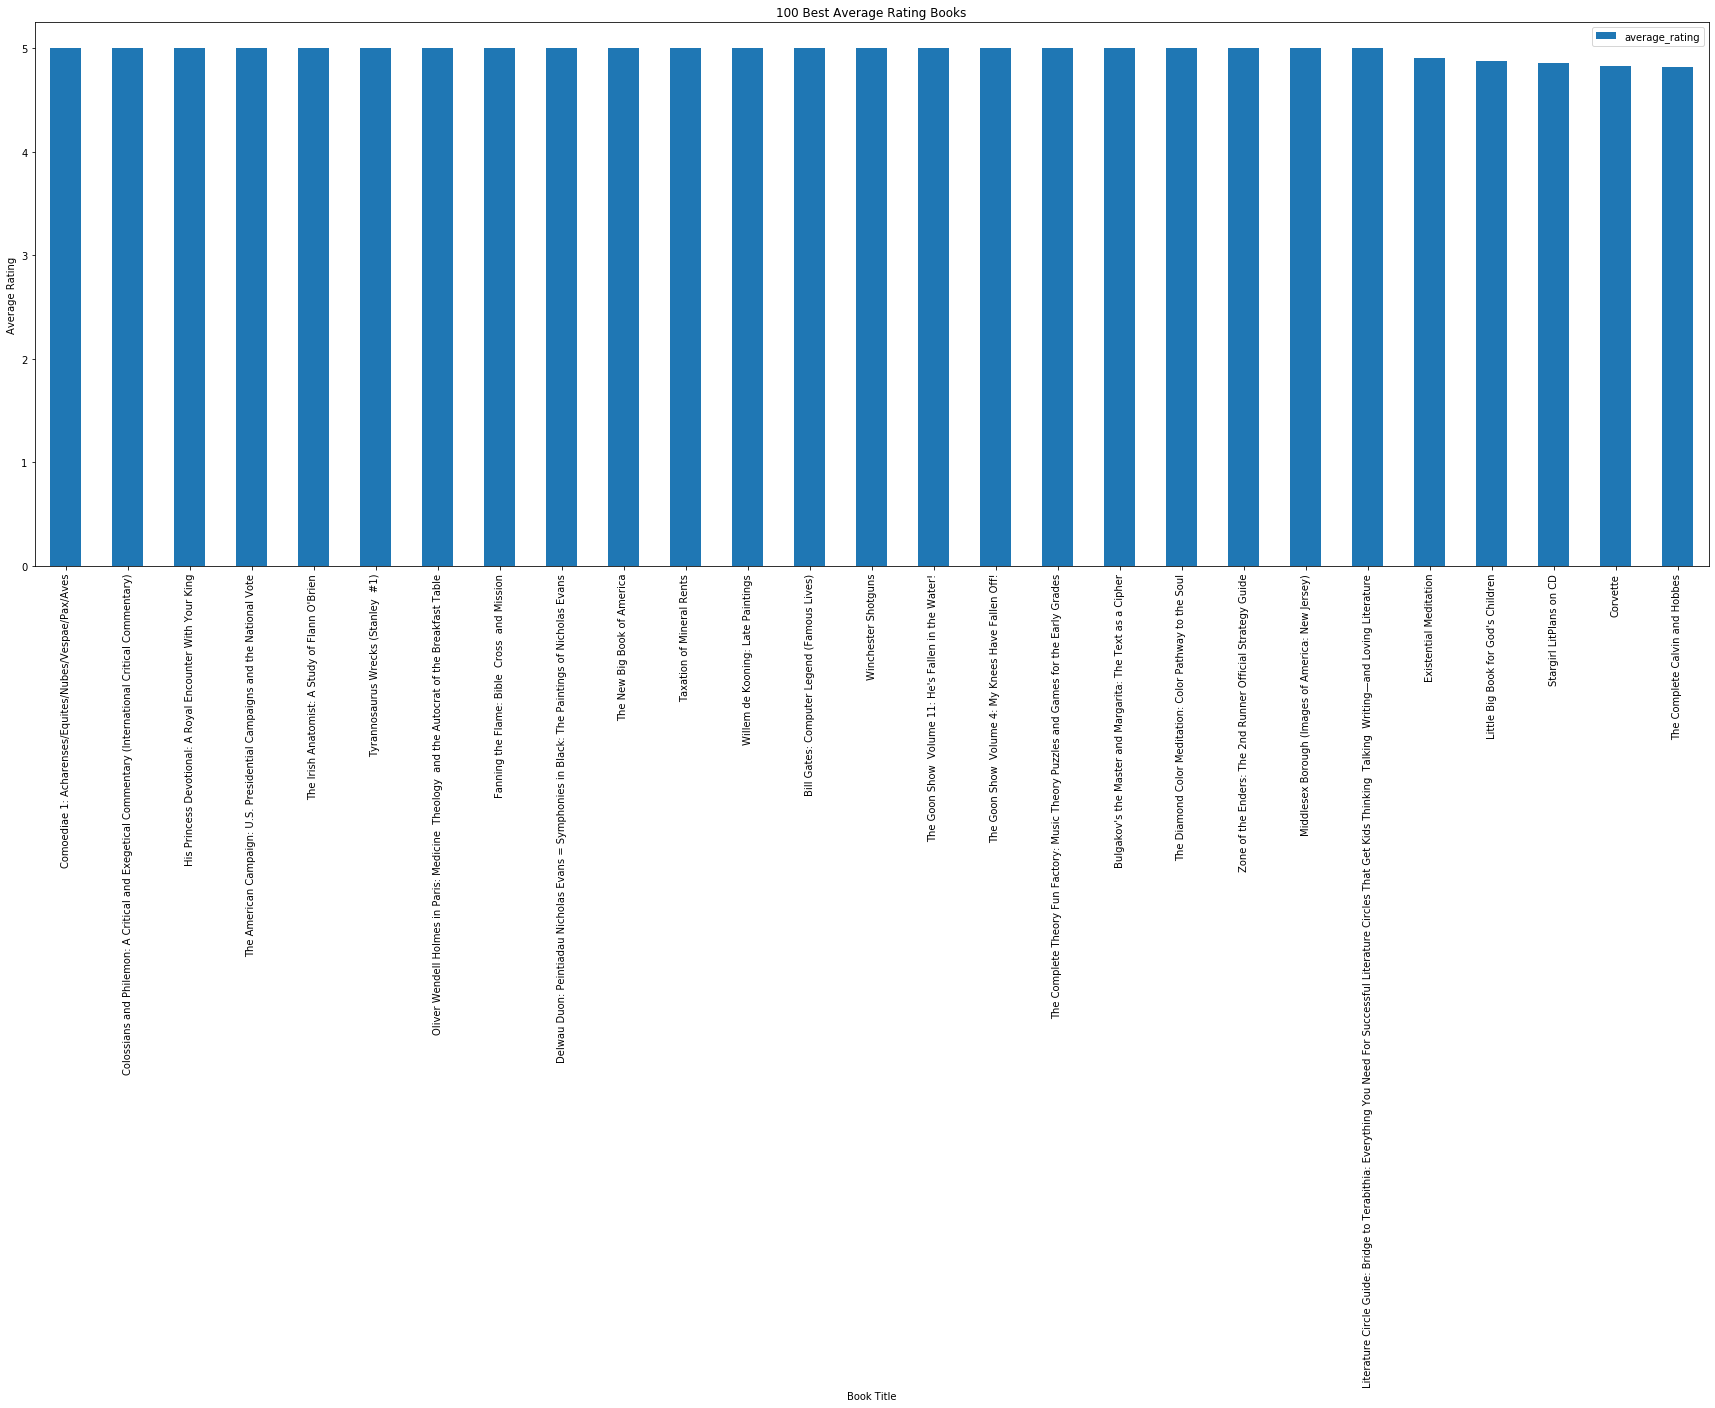

In [32]:
top = df[df.average_rating>4.8].sort_values(by='average_rating',ascending=False).head(100)
top.plot('title','average_rating',kind='bar',figsize=(30,10))

plt.xlabel('Book Title')
plt.ylabel('Average Rating')
plt.title('100 Best Average Rating Books')

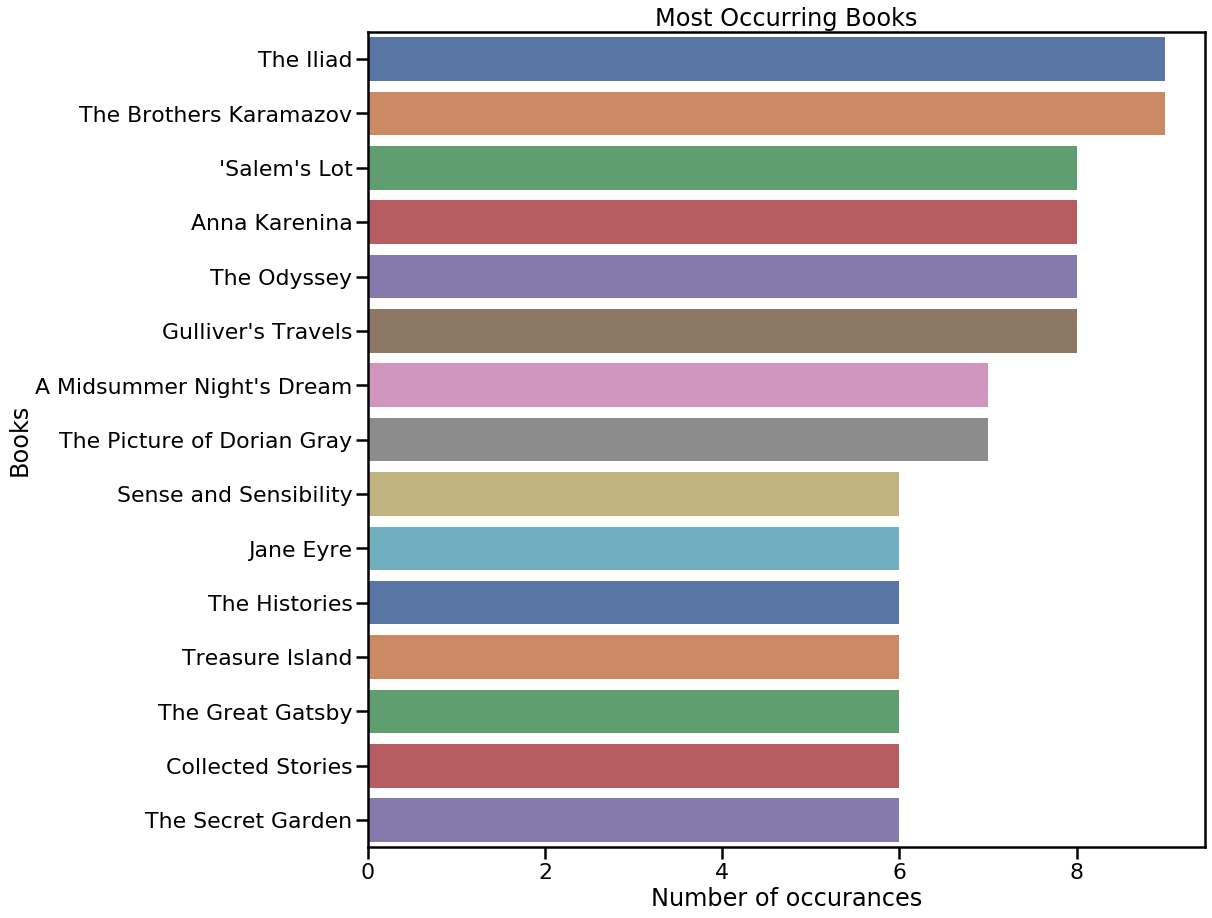

In [33]:
#Analysing the top 15 Books

sns.set_context('poster')
plt.figure(figsize=(15,15))
books = df['title'].value_counts()[:15]
rating = df.average_rating[:15]
sns.barplot(x = books, y = books.index, palette='deep')
plt.title("Most Occurring Books")
plt.xlabel("Number of occurances")
plt.ylabel("Books")
plt.show()

<Figure size 1080x720 with 0 Axes>

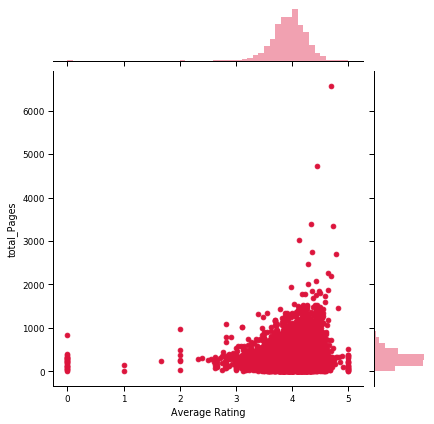

In [34]:
plt.figure(figsize=(15,10))
sns.set_context('paper')
ax = sns.jointplot(x="average_rating", y="total_pages", data = df, color = 'crimson')
ax.set_axis_labels("Average Rating", "total_Pages")

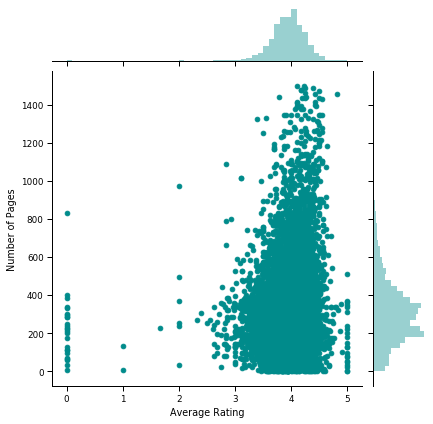

In [35]:
without_pages_outliers = df[~(df['total_pages']>1500)]
ax = sns.jointplot(x="average_rating", y="total_pages", data = without_pages_outliers, color = 'darkcyan')
ax.set_axis_labels("Average Rating", "Number of Pages")

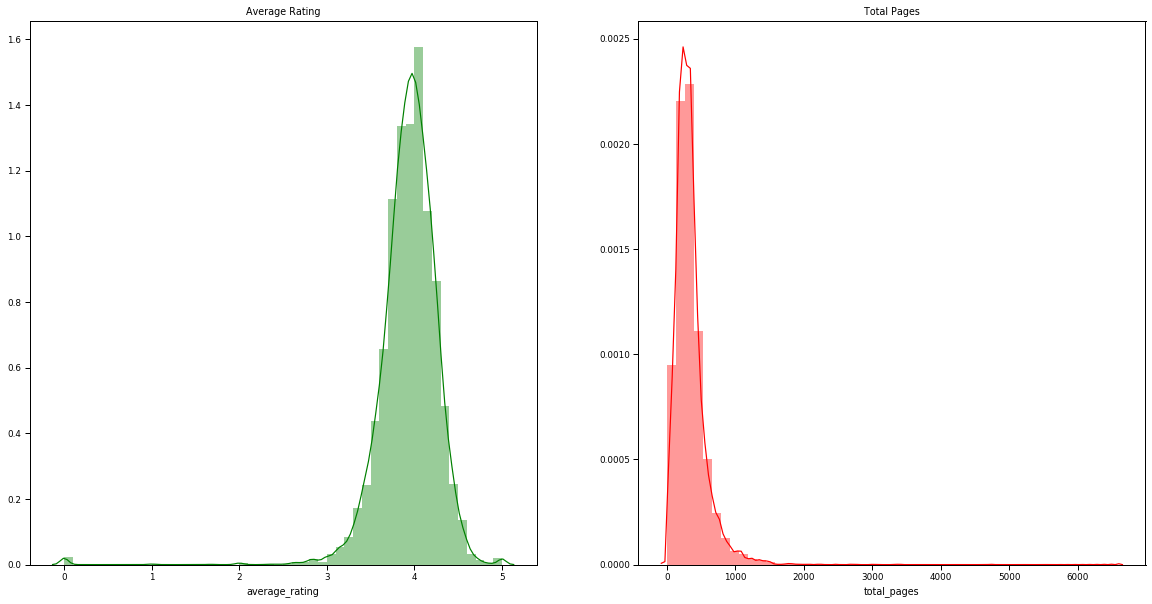

In [36]:
fg, ax = plt.subplots(1,2, figsize=(20,10))

sns.distplot(df['average_rating'], ax=ax[0], color='g')
ax[0].set_title('Average Rating')

sns.distplot(df['total_pages'], ax=ax[1], color='r')
ax[1].set_title('Total Pages')

plt.show()

In [47]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

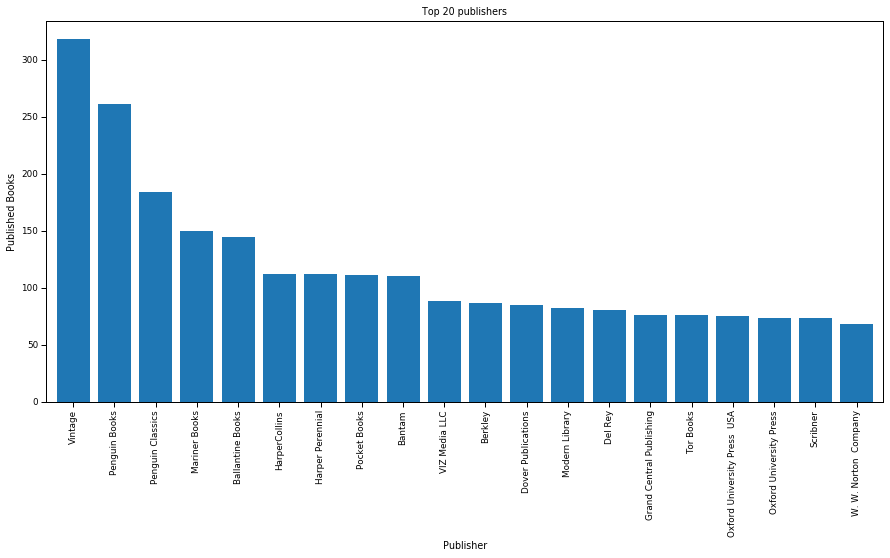

In [48]:
# top 20 publishers distribution by book count
df['publisher'].value_counts()[:20].plot(kind='bar', width=0.8)
f = plt.gcf()
f.set_size_inches(15,7)
plt.title("Top 20 publishers")
plt.ylabel('Published Books')
plt.xlabel('Publisher')
plt.show()

                             title
authors                           
P.G. Wodehouse                  40
Stephen King                    40
Rumiko Takahashi                39
Orson Scott Card                35
Agatha Christie                 33
Piers Anthony                   30
Mercedes Lackey                 29
Sandra Brown                    29
Dick Francis                    28
James Patterson                 23
Laurell K. Hamilton             23
Margaret Weis/Tracy Hickman     23
Terry Pratchett                 23
Gordon Korman                   22
Alan Dean Foster                21


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 <a list of 15 Text xticklabel objects>)

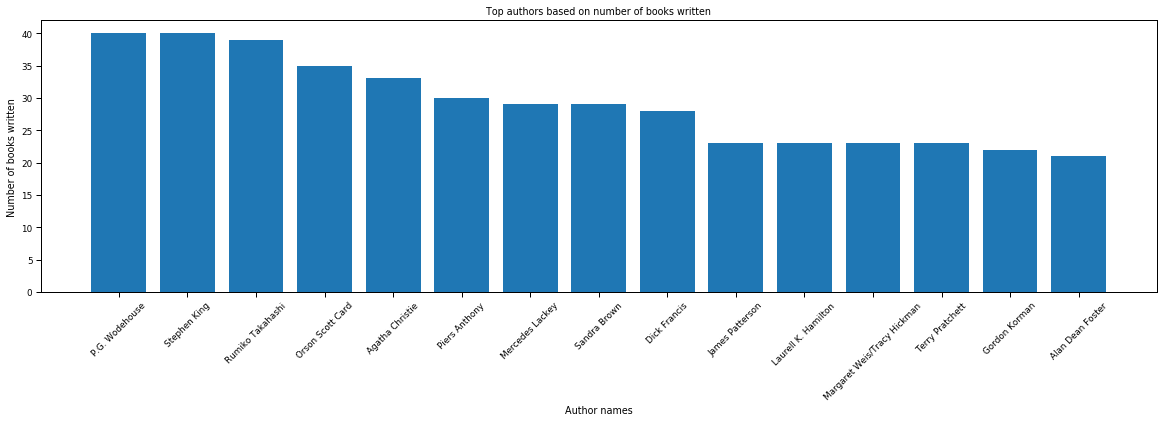

In [65]:
#Books per author in the dataset
books_per_author = df.groupby(['authors']).count()[['title']].nlargest(15, 'title')
print(books_per_author)

plt.figure(figsize = (20,5))
plt.title("Top authors based on number of books written")
plt.xlabel("Author names")
plt.ylabel("Number of books written")
plt.bar(books_per_author.index, books_per_author["title"])
plt.xticks(rotation = 45)

                                                    ratings_count
authors                                                          
J.K. Rowling                                              8999024
J.R.R. Tolkien                                            4776638
Stephenie Meyer                                           4597666
Dan Brown                                                 4135380
Nicholas Sparks                                           3048149
Stephen King                                              2985634
J.D. Salinger                                             2777908
Rick Riordan                                              2413447
George Orwell/Boris Grabnar/Peter Škerl                   2111750
John Steinbeck                                            2091579
Jodi Picoult                                              2065777
William Golding                                           2040919
William Shakespeare/Paul Werstine/Barbara A. Mowat        1894439
Lois Lowry

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 <a list of 15 Text xticklabel objects>)

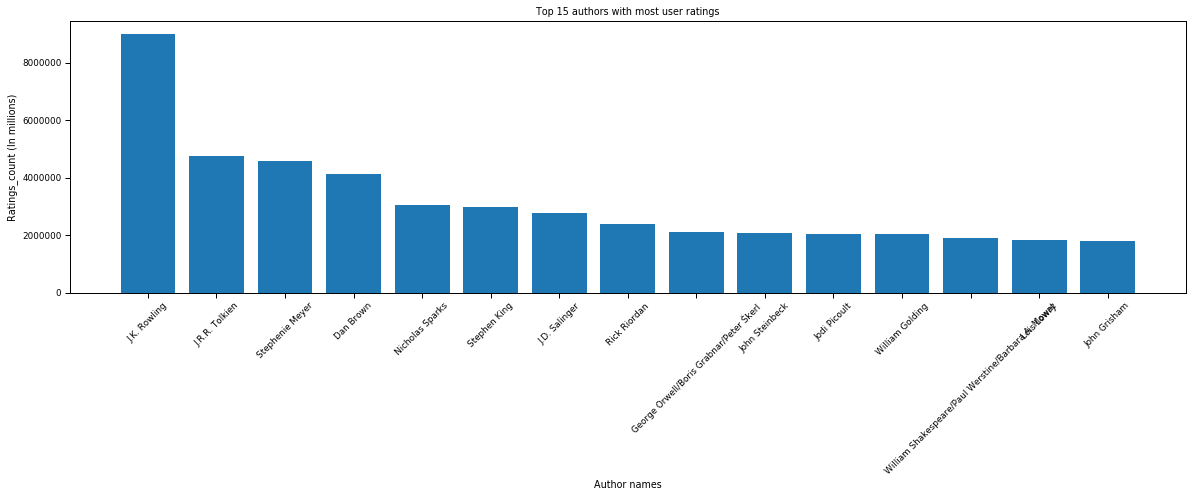

In [66]:
#Author ratings count
num_of_ratings = df.groupby(['authors']).sum()[['ratings_count']].nlargest(15, 'ratings_count')
print(num_of_ratings)
plt.figure(figsize = (20, 5))
plt.title("Top 15 authors with most user ratings")
plt.xlabel("Author names")
plt.ylabel("Ratings_count (In millions)")
plt.bar(num_of_ratings.index, num_of_ratings['ratings_count'])
plt.xticks(rotation = 45)

In [53]:
df.corr()

,bookID,average_rating,isbn13,total_pages,ratings_count,text_reviews_count
bookID,1.00,-0.04,-0.00,-0.03,-0.08,-0.08
average_rating,-0.04,1.00,-0.00,0.15,0.04,0.03
isbn13,-0.00,-0.00,1.00,-0.01,0.01,0.01
total_pages,-0.03,0.15,-0.01,1.00,0.03,0.04
ratings_count,-0.08,0.04,0.01,0.03,1.00,0.87
text_reviews_count,-0.08,0.03,0.01,0.04,0.87,1.00


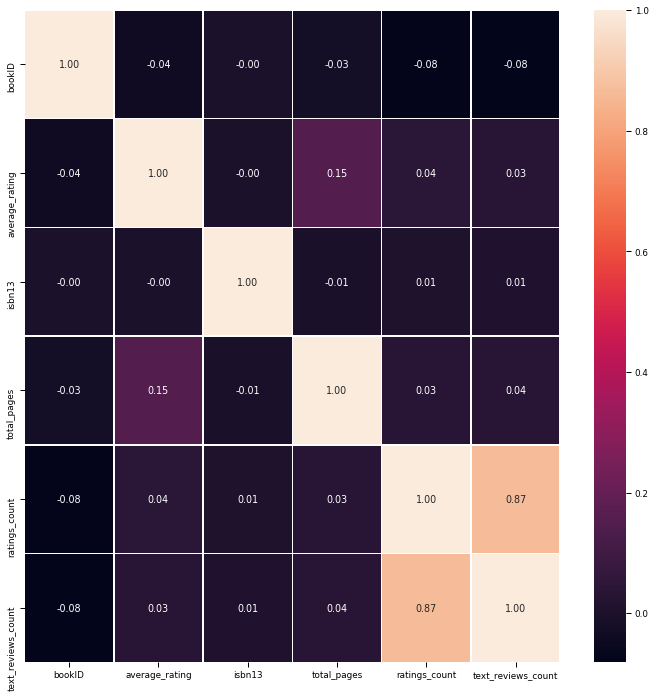

In [54]:
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(df.corr(), annot=True, linewidths=0.5, fmt='.2f', ax=ax)

In [57]:
books_with_atmost_200_pages = df[df['total_pages'] <= 200]
best_books_with_atmost_200_pages = books_with_atmost_200_pages.nlargest(10, ['ratings_count'])

Text(0.5, 1.0, 'Top 10 books with <=200 pages')

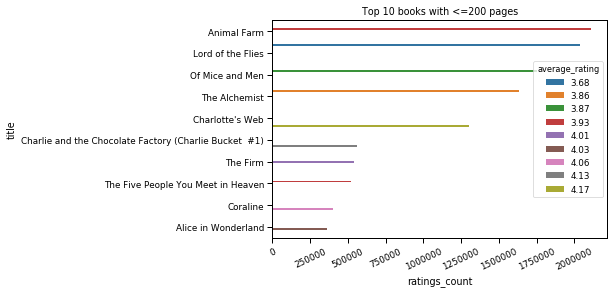

In [58]:
sns.barplot(best_books_with_atmost_200_pages['ratings_count'],
            best_books_with_atmost_200_pages['title'], 
            hue = best_books_with_atmost_200_pages['average_rating'])
plt.xticks(rotation=25)
plt.title('Top 10 books with <=200 pages')

In [59]:
big_books = df[df['total_pages'] >= 1000]
best_big_books = big_books.nlargest(10, ['ratings_count'])

Text(0.5, 1.0, 'Top 10 books with more >=1000 pages')

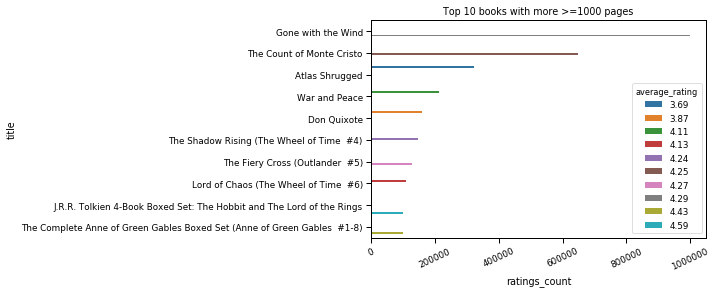

In [60]:
sns.barplot(best_big_books['ratings_count'],
            best_big_books['title'], 
            hue = best_big_books['average_rating'])
plt.xticks(rotation=25)
plt.title('Top 10 books with more >=1000 pages')

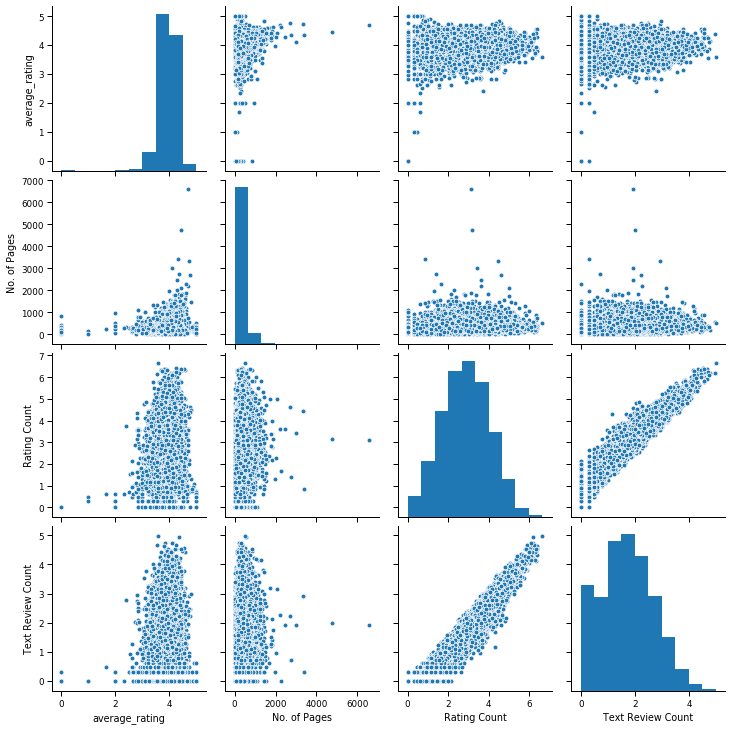

In [64]:
x = df['average_rating']
y = df['total_pages']
z = np.log10(df['ratings_count']+1)
p = np.log10(df['text_reviews_count']+1)


sns.pairplot(pd.DataFrame(list(zip(x,y,z,p)),columns=['average_rating','No. of Pages', 'Rating Count', 'Text Review Count']),
                           markers="o",palette="husl")